# SimuPark: Fake Times

392.47197860023283


Text(0, 0.5, 'Frecuencia')

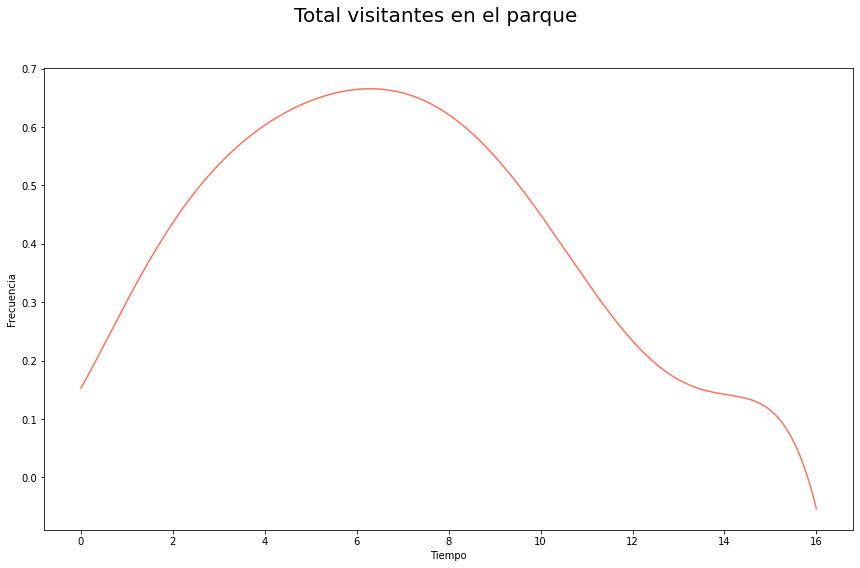

In [1]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

fig = gcf()
fig.set_size_inches(14.5, 8.5)

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (((0.631012633902875 * ((x+1) ** 0 ) + 0.141641794969108 * ((x+1) ** 1 ) + 1.08320562754808 * ((x+1) ** 2 ) + -0.386896805430061 * ((x+1) ** 3 ) + 0.0645561077512354 * ((x+1) ** 4 ) + -0.00580069833046977 * ((x+1) ** 5 ) + 0.000263776181717327 * ((x+1) ** 6 ) + -4.72376212119374e-06 * ((x+1) ** 7 ))) / 10)

print(sum(fn(x, k)))

plot(x, fn(x,k), color='#ff725e')
fig.suptitle('Total visitantes en el parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')

In [2]:
from simuPark.park import Activity, Attraction, FakeTimesPark
from simuPark.person import Person, Archetype
import random

park = FakeTimesPark(
    fn=fn
)

park.start_day(max_entry_rate=95000/960)

Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:20<00:00, 46.60it/s] 


38973
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['DINOSAUR', 'Expedition Everest', 'Flight of Passage', 'Kali River Rapids', 'Kilimanjaro Safaris', "Na'vi River Journey", 'TriceraTop Spin']
['Tourist', 'Average', 'Activity Enjoyer', 'Attraction Enjoyer', 'All Day Park', 'Relaxed Visitor']


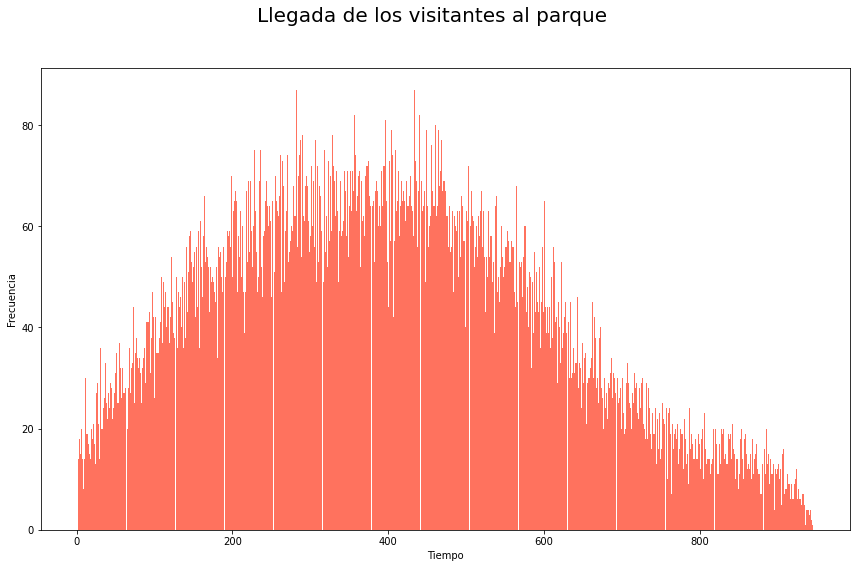

In [3]:
print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [4]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,total_wait_time,average_wait_time
0,Average,1,257,256,50,2,53,26.500000
1,Relaxed Visitor,1,181,180,25,3,27,9.000000
2,Average,1,294,293,50,4,86,21.500000
3,Relaxed Visitor,1,275,274,25,6,19,3.166667
4,Activity Enjoyer,1,254,253,10,3,13,4.333333
...,...,...,...,...,...,...,...,...
38968,Activity Enjoyer,943,960,17,10,0,0,0.000000
38969,Average,944,960,16,50,0,0,0.000000
38970,Activity Enjoyer,944,960,16,10,0,0,0.000000
38971,Attraction Enjoyer,945,960,15,70,0,3,0.000000


Atracciones experimentadas promedio: 3.58604675031432
Atracciones experimentadas desviación estandar: 3.123533981316826


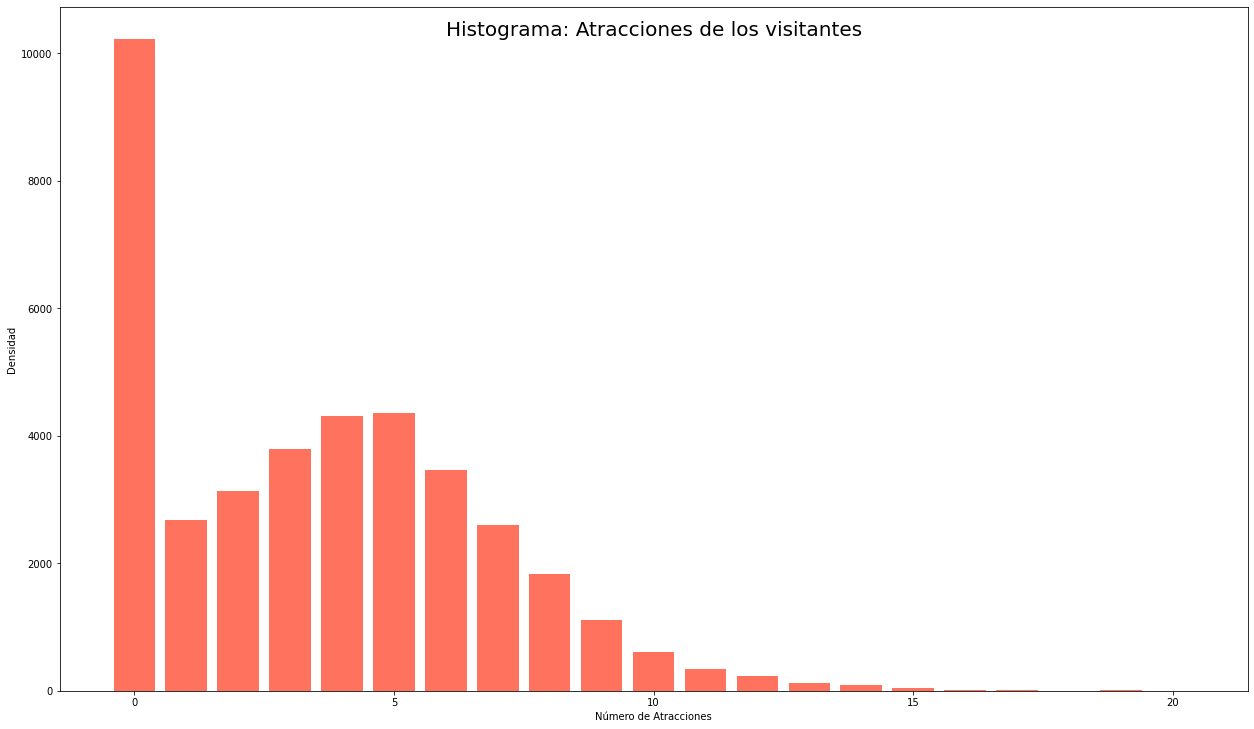

In [5]:
heights = [0 for _ in range(np.max(guest_df['attractions_experienced'])+1)]
labels = [i for i in range(np.max(guest_df['attractions_experienced'])+1)]
attrExp = [guest.attractions_experienced for guest in park.guests]

for guest in park.guests:
    heights[guest.attractions_experienced] += 1

fig = figure()
fig.set_size_inches(16.5, 9.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, heights, color="#ff725e");
fig.suptitle('Histograma: Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')
print(f'Atracciones experimentadas desviación estandar: {np.std(attrExp)}')

29.835362639537404


Text(0, 0.5, 'Densidad')

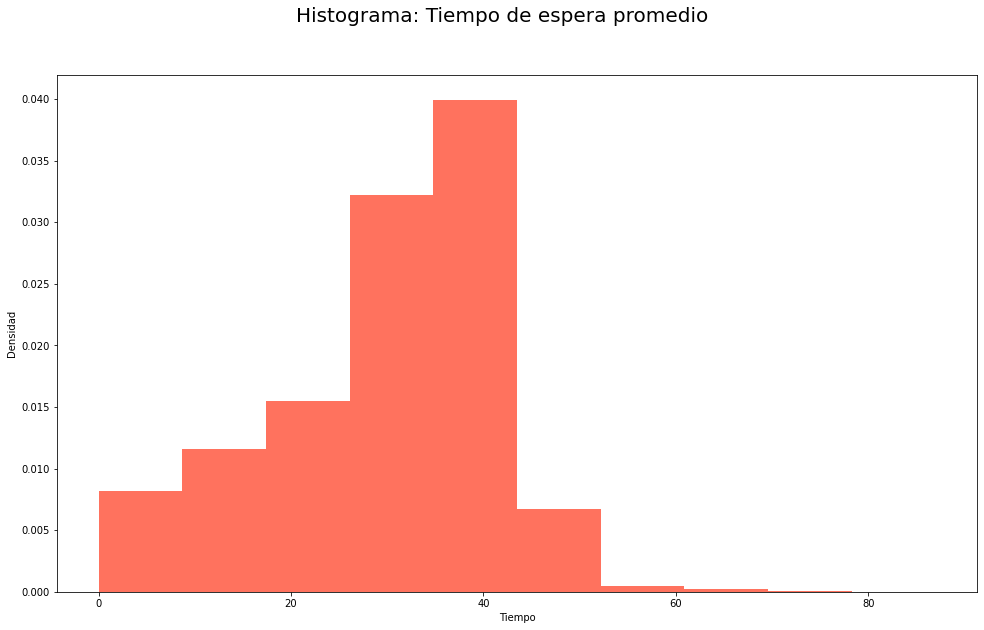

In [8]:
avgWaitTime = []

for guest in park.guests:
    if guest.attractions_experienced == 0:
        continue

    avgWaitTime.append(guest.total_wait_time / guest.attractions_experienced)

print(np.mean(avgWaitTime))

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(avgWaitTime, density=True, color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')


In [7]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,DINOSAUR,25
1,Expedition Everest,20
2,Flight of Passage,35
3,Kali River Rapids,10
4,Kilimanjaro Safaris,15
5,Na'vi River Journey,30
6,TriceraTop Spin,0
